In [ ]:
#import librabries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

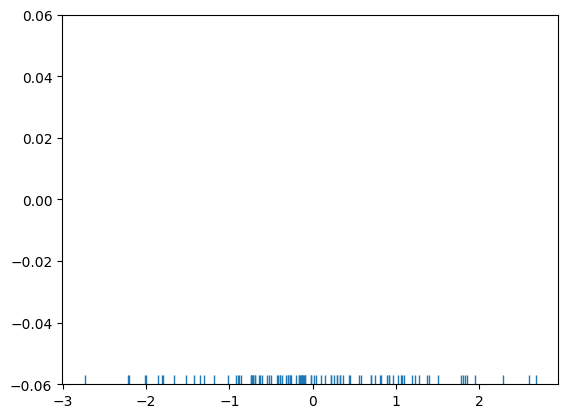

In [ ]:
#create dataset
dataset = np.random.randn(100)

#create another rugplot
sns.rugplot(dataset);

#set up the x-axis for the plot
x_min = dataset.min()-2
x_max = dataset.max()+2

#100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

In [ ]:
print(x_min,x_max)

-4.738594430349178 4.679527427331603


In [ ]:
#set up the bandwidth , for info on this:
url='https://wikipedia.org/wiki/kernel_density_estimation#Pratical_estimation_of_the_bandwidth'

bandwidth=((4*dataset.std()**-0.5/(3*len(dataset))))**0.2
bandwidth

0.4181642827388156

(0.0, 1.0)

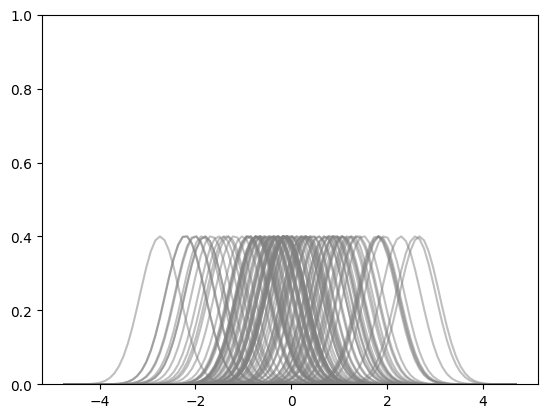

In [ ]:
#create an empty kernel
kernel_list=[]

#plot each basis function
for data_point in dataset:

  #create a kernel for each point and append to list
  kernel=stats.norbm(data_point,bandwidth).pdf(x_axis)
  kernel_list.append(kernel)

  #scale for plotting
  kernel= kernel / kernel.max()
  kernel = kernel * .4
  plt.plot(x_axis,kernel,color='grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'sum of the basis functions')

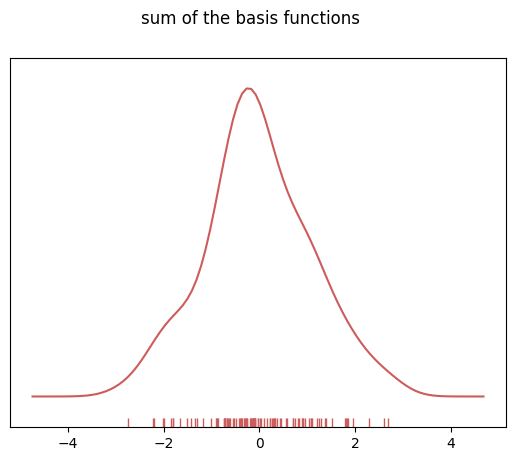

In [ ]:
# to get the kde plot we can sum these basis function

 #plot the sum of the basis function
sum_of_kde=np.sum(kernel_list,axis=0)

 #plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

 #add the initial reugplot
sns.rugplot(dataset,c='indianred')

 #get rid of y-axis marks
plt.yticks([])

 #set title
plt.suptitle("sum of the basis functions")